**Importing Required Libraries**

In [ ]:
import io
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc

warnings.filterwarnings('ignore')

**Uploading the data set**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving oasis_longitudinal.csv to oasis_longitudinal.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['oasis_longitudinal.csv']))

**Reading the dataset CSV file into a dataframe**

In [ ]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
print(df['Visit'])

0      1
1      2
2      1
3      2
4      3
      ..
368    2
369    3
370    1
371    2
372    3
Name: Visit, Length: 373, dtype: int64


**Summary of the dataset.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


**Statistical summary of the dataset**

In [ ]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


**Checking for Null values**

In [ ]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In the above output, it is clear that there are 19 null values in SES column and 2 null values in MMSE column.

In [ ]:
# 'duplicated()' function in pandas returns the duplicated rows as True and other rows as False
# For counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

**Filling the Null values using mean and median**

In [ ]:
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

**Plotting the Bar graph using the column 'Visit' i.e., people who made a single visit and the 'Group' feature (Target Variable) i.e., status of the disease.**

<Axes: xlabel='Group', ylabel='count'>

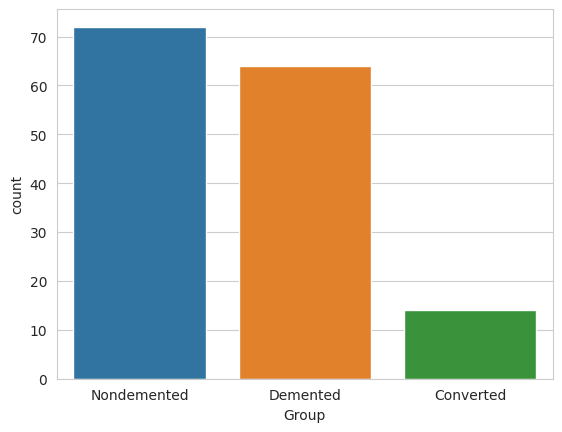

In [ ]:
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

**Replacing Converted rows to the Demented rows.**

<Axes: xlabel='Group', ylabel='count'>

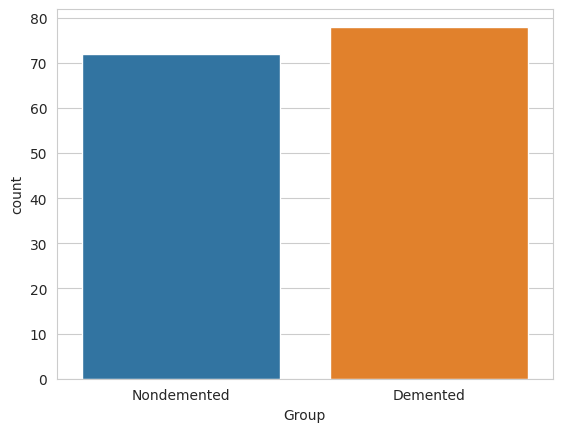

In [ ]:
ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

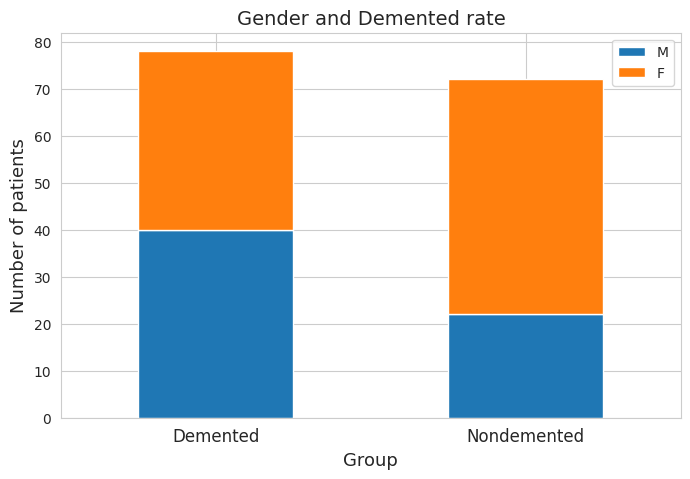

In [ ]:
# Function used for the bar graph
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)


# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

**Converting the Categorical data into Numerical Data**

In [ ]:
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [ ]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
def plot_roc(model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probabilities = model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=' ' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**Splitting the data into Train and Test.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values


# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)






**Function that returns the Confusion Matrix for the specified model**

In [ ]:
def plot_confusion_matrix(y_test, predictions):

    cm = confusion_matrix(y_test, predictions)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

    plt.figure(figsize = (6,4))
    sns.heatmap(cm_norm,
            annot=True,
            cmap="Spectral")
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual/Observed', fontsize=10);
    plt.title('Confusion Matrix')

**1) Gradient Boosting Classifier:**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(random_state=0)


In [ ]:
## Fitting the model
%%time
clf.fit(X_train, y_train)

CPU times: user 180 ms, sys: 2.67 ms, total: 183 ms
Wall time: 298 ms


GradientBoostingClassifier(random_state=0)

In [ ]:
clf.score(X_test, y_test)

0.8133333333333334

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

**Grid Search CV for Hyper parameter Tuning**

In [ ]:
param_grid = {  'max_depth':[5,6,7,8,9], 'max_features': ['sqrt', 'log2'], 'n_estimators': [50,100,150,200,250,300,350,400,450,500,550,600,650,700]}
GBC = GradientBoostingClassifier(random_state=15)


In [ ]:
%%time
grid_GBC = GridSearchCV(estimator=GBC, param_grid = param_grid, cv = 5, n_jobs=1)
grid_GBC.fit(X_train, y_train)

CPU times: user 8min 12s, sys: 2.56 s, total: 8min 15s
Wall time: 8min 28s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=15),
             n_jobs=1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(max_depth=5, max_features='sqrt', n_estimators=600,
                           random_state=15)

 The best score across ALL searched params:
 0.8490960451977401

 The best parameters across ALL searched params:
 {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 600}


In [ ]:
gb = GradientBoostingClassifier(max_depth=5,n_estimators=600,max_features='sqrt',random_state=0)

In [ ]:
# Fitting the model after hyper-parameter tuning
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, max_features='sqrt', n_estimators=600,
                           random_state=0)

In [ ]:
gb.score(X_test, y_test)

0.8266666666666667

In [ ]:
# Prediction using test data
gb_y_pred = gb.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, gb_y_pred)

In [ ]:
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

In [ ]:
# Calculate the true positive rate (TPR) and false positive rate (FPR)
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)

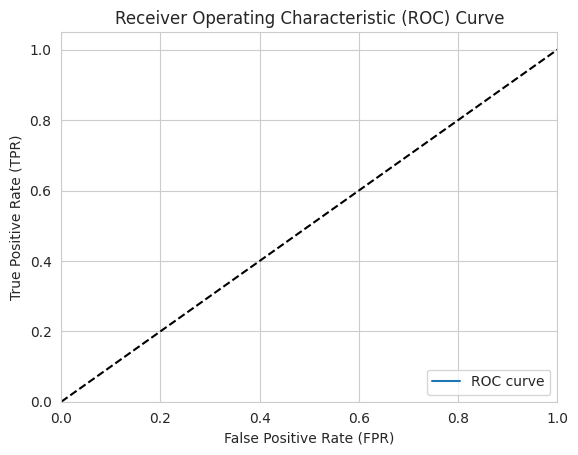

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

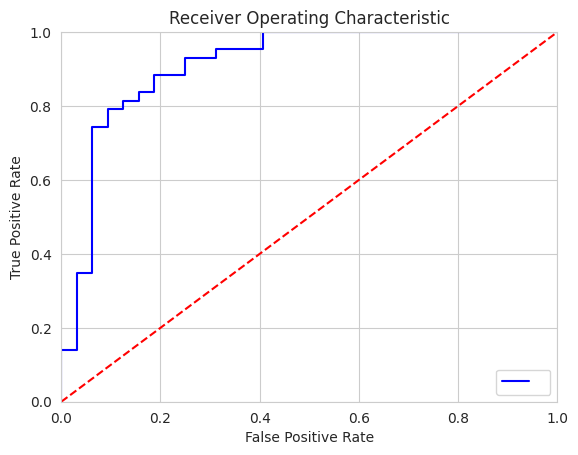

In [ ]:
plot_roc(gb, X_test, y_test)

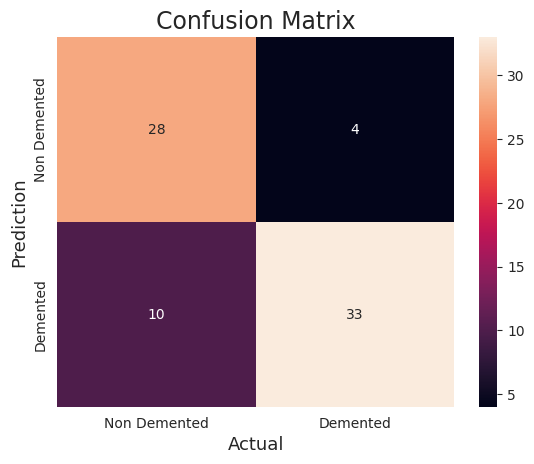

Accuracy   : 0.827
Precision : 0.875
Recall    : 0.814
F1-score  : 0.843


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, gb_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, gb_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, gb_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, gb_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(gb,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.73333333 0.81666667 0.85       0.83050847 0.86440678]
Average Cross Validation score :0.8189830508474577


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,gb_y_pred)
auc_roc

0.8288517441860466

**2) Extreme Gradient Boosting Classifier:**

In [ ]:
## Fitting the Extreme Gradient Boosting Classifer model
%%time
clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())

CPU times: user 111 ms, sys: 2.98 ms, total: 114 ms
Wall time: 90.4 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
clf_xgb.score(X_test, y_test)

0.8

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

**Grid Search CV**

In [ ]:
param_grid = {  'min_child_weight': [1, 5, 10,15],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.4,0.6, 0.8, 1.0],
        'colsample_bytree': [0.4,0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5,6,7,8,9,10] }



In [ ]:
grid_XGBC = GridSearchCV(estimator=clf_xgb, param_grid = param_grid, cv = 5, n_jobs=1)
grid_XGBC.fit(X_train, y_train.ravel())

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_child_weight': [1, 5, 10, 15],
                         'subsample': [0.4, 0.6, 0.8, 1.0]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

 The best score across ALL searched params:
 0.8357627118644068

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 4, 'min_child

In [ ]:
xgb = XGBClassifier(colsample_bytree=0.8, gamma=1.5, max_depth=4, enable_categorical=False, min_child_weight=1, subsample=1)

In [ ]:
## Fitting the model after hyper-parameter tuning
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
clf_xgb.score(X_test, y_test)

0.8

In [ ]:
# Prediction using test data
xgb_y_pred = clf_xgb.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, xgb_y_pred)

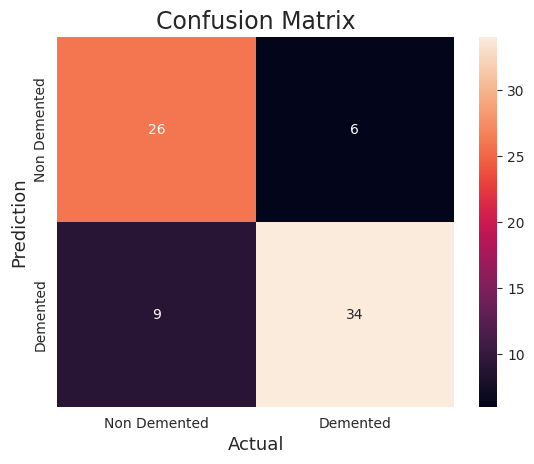

Accuracy   : 0.8
Precision : 0.85
Recall    : 0.791
F1-score  : 0.819


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, xgb_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, xgb_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, xgb_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, xgb_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(xgb,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.71666667 0.78333333 0.81666667 0.84745763 0.86440678]
Average Cross Validation score :0.8057062146892655


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,xgb_y_pred)
auc_roc


0.8015988372093024

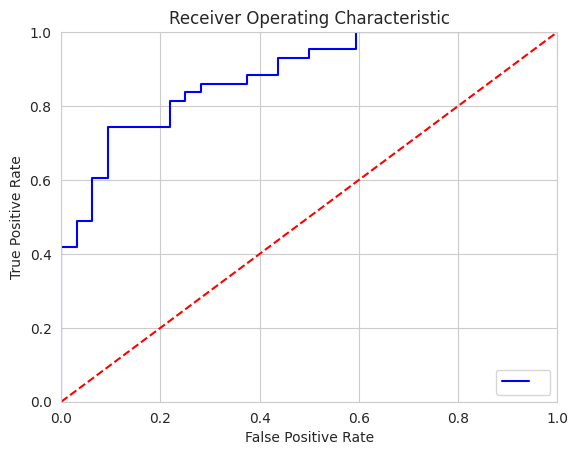

In [ ]:
plot_roc(xgb, X_test, y_test)

**3) Support Vector Classifier:**

In [ ]:
# Fitting the model
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())

SVC(C=0.1, kernel='linear', random_state=0)

In [ ]:
svm.score(X_test, y_test)

0.76

In [ ]:
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf', 'sigmoid']}

**Grid Search CV**

In [ ]:
%%time
grid_svm = GridSearchCV(SVC(),param_grid_svc,verbose=2)
grid_svm.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_svm.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_svm.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_svm.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1000, gamma=0.0001)

 The best score across ALL searched params:
 0.7988135593220339

 The best parameters across ALL searched params:
 {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
svm_best = SVC(C=1000, gamma=0.0001, kernel = 'rbf', random_state=0)

In [ ]:
# Fitting the model after hyper-parameter tuning
%%time
svm_best.fit(X_train,y_train)

CPU times: user 32.1 ms, sys: 0 ns, total: 32.1 ms
Wall time: 34.3 ms


SVC(C=1000, gamma=0.0001, random_state=0)

In [ ]:
svm_best.score(X_test, y_test)

0.7733333333333333

In [ ]:
# Prediction using test data
svm_best_y_pred = svm_best.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, svm_best_y_pred)

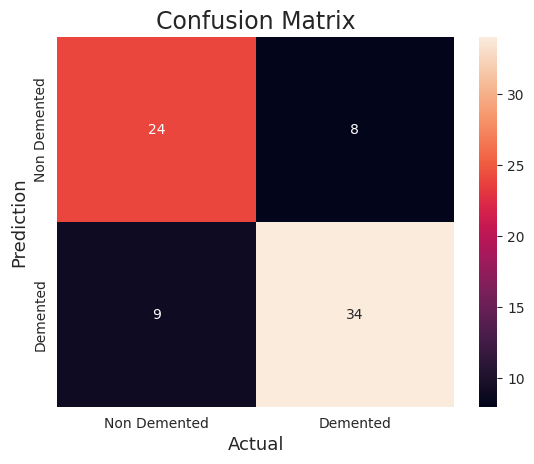

Accuracy   : 0.773
Precision : 0.81
Recall    : 0.791
F1-score  : 0.8


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, svm_best_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, svm_best_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, svm_best_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, svm_best_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(svm,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.76666667 0.75       0.86666667 0.79661017 0.81355932]
Average Cross Validation score :0.7987005649717515


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,svm_best_y_pred)
auc_roc


0.7703488372093024

In [ ]:
# plot_roc(svm, X_test, y_test)

AttributeError: ignored

**4) Random Forest Classifier:**

In [ ]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='auto',n_estimators=200,random_state=0)
rfc.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=0)

In [ ]:
rfc.score(X_test, y_test)

0.8

In [ ]:
param_grid = {'max_depth': [5,10,15,20], 'max_features': ['sqrt', 'auto'], 'n_estimators':[50,100,150,200], 'criterion' :['gini']}

**Grid Search CV**

In [ ]:
g_rfc_search = GridSearchCV(estimator = rfc, param_grid = param_grid,

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
%%time
g_rfc_search.fit(X_train, y_train.ravel())

CPU times: user 24.2 s, sys: 139 ms, total: 24.4 s
Wall time: 24.6 s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=8, max_features='auto',
                                              n_estimators=200,
                                              random_state=0),
             n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'auto'],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",g_rfc_search.best_estimator_)
print("\n The best score across ALL searched params:\n",g_rfc_search.best_score_)
print("\n The best parameters across ALL searched params:\n",g_rfc_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

 The best score across ALL searched params:
 0.8424579124579125

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
rfc_best = RandomForestClassifier(criterion='gini',max_depth=10,max_features='sqrt',n_estimators=200,random_state=0)


In [ ]:
# Fitting the model after hyper tuning the parameters
%%time
rfc_best.fit(X_train,y_train)

CPU times: user 361 ms, sys: 3.01 ms, total: 364 ms
Wall time: 364 ms


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [ ]:
rfc_best.score(X_test, y_test)

0.8

In [ ]:
# Prediction using test data
rfc_best_y_pred = rfc_best.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, rfc_best_y_pred)

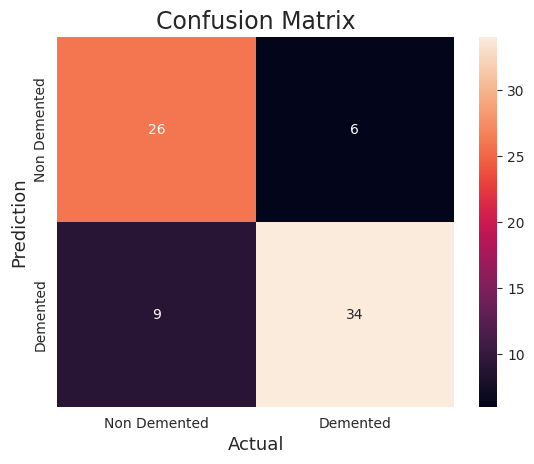

Accuracy   : 0.8
Precision : 0.85
Recall    : 0.791
F1-score  : 0.819


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, rfc_best_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, rfc_best_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, rfc_best_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, rfc_best_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(rfc,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.78333333 0.78333333 0.85       0.83050847 0.86440678]
Average Cross Validation score :0.822316384180791


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,rfc_best_y_pred)
auc_roc

0.8015988372093024

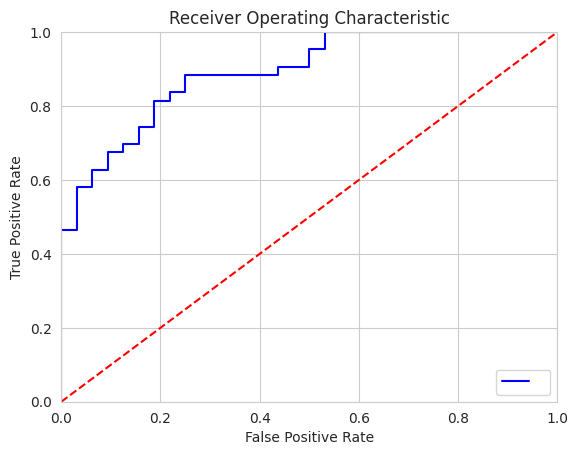

In [ ]:
plot_roc(rfc, X_test, y_test)

**5) Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')

In [ ]:
## Fitting the model
%%time
model.fit(X_train,y_train)

CPU times: user 23.2 ms, sys: 7 µs, total: 23.2 ms
Wall time: 39.4 ms


LogisticRegression(penalty='none')

In [ ]:
model.score(X_test, y_test)

0.7466666666666667

**Hyper Prameter Tuning**

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]


In [ ]:
lr_search = GridSearchCV(estimator = model, param_grid = param_grid,

                          cv = 5, n_jobs = -1, verbose = True, return_train_score=True)

In [ ]:
lr_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(penalty='none'), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, verbose=True)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",lr_search.best_estimator_)
print("\n The best score across ALL searched params:\n",lr_search.best_score_)
print("\n The best parameters across ALL searched params:\n",lr_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=78.47599703514607)

 The best score across ALL searched params:
 0.8054237288135593

 The best parameters across ALL searched params:
 {'C': 78.47599703514607, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
model_best = LogisticRegression(penalty='l2', C = 78.47599703514607,  max_iter=100, solver = 'lbfgs')

In [ ]:
# Fitting the model after tuning the hyper parameters
model_best.fit(X_train,y_train)

LogisticRegression(C=78.47599703514607)

In [ ]:
model_best.score(X_test, y_test)

0.7466666666666667

In [ ]:
# Prediction using test data
model_best_y_pred = model_best.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, model_best_y_pred)

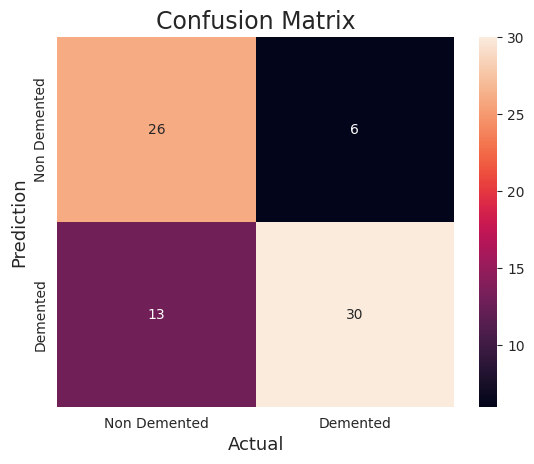

Accuracy   : 0.747
Precision : 0.833
Recall    : 0.698
F1-score  : 0.759


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, model_best_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, model_best_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, model_best_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, model_best_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.73333333 0.8        0.86666667 0.81355932 0.76271186]
Average Cross Validation score :0.7952542372881355


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,model_best_y_pred)
auc_roc

0.7550872093023255

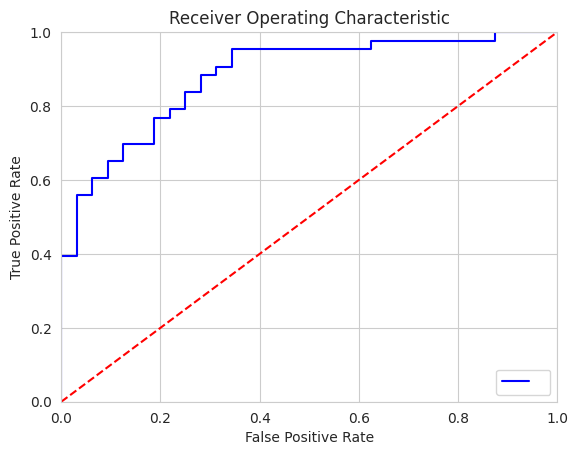

In [ ]:
plot_roc(model, X_test, y_test)

**6) Hard Voting Classifier:**

In [ ]:
%%time
from sklearn import ensemble
from sklearn.model_selection import cross_validate as cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import cross_validate
import math



vote_est = [('etc',ensemble.ExtraTreesClassifier(random_state=0)),
            ('gb',GradientBoostingClassifier(random_state=0)),
            ('abc',AdaBoostClassifier(random_state=0)),
    ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200,random_state=0)),
    ('svc', SVC(probability=True,random_state=0)),
    ('xgb', XGBClassifier(random_state=0)),

           ]


vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
# vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())

vote_hard.fit(X_train, y_train.ravel()) # Fitting the model

CPU times: user 810 ms, sys: 8.92 ms, total: 819 ms
Wall time: 794 ms


VotingClassifier(estimators=[('etc', ExtraTreesClassifier(random_state=0)),
                             ('gb', GradientBoostingClassifier(random_state=0)),
                             ('abc', AdaBoostClassifier(random_state=0)),
                             ('rfc',
                              RandomForestClassifier(max_depth=8,
                                                     max_features='auto',
                                                     n_estimators=200,
                                                     random_state=0)),
                             ('svc', SVC(probability=True, random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, boost...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0, ...))])

In [ ]:
# Prediction using test data
y_pred_hard_voting = vote_hard.predict(X_test)

In [ ]:
vote_hard.score(X_test, y_test)

0.8

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred_hard_voting)

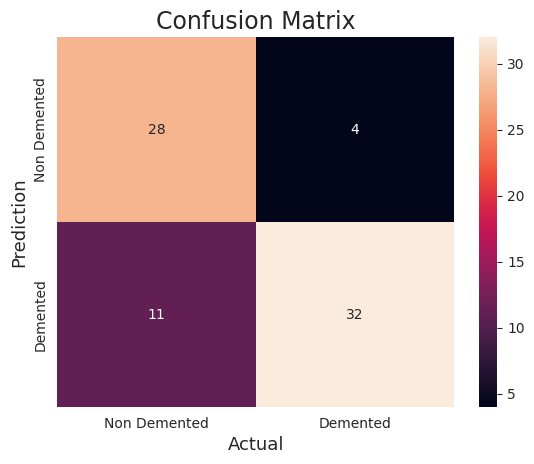

Accuracy   : 0.8
Precision : 0.889
Recall    : 0.744
F1-score  : 0.81


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, y_pred_hard_voting),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, y_pred_hard_voting),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, y_pred_hard_voting),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, y_pred_hard_voting),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(vote_hard,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.75       0.8        0.85       0.83050847 0.83050847]
Average Cross Validation score :0.8122033898305083


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred_hard_voting)
auc_roc

0.809593023255814

In [ ]:
#plot_roc(vote_hard, X_test, y_test)

**7) Soft Voting Classifier:**

In [ ]:
%%time
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())

vote_soft.fit(X_train, y_train.ravel())


CPU times: user 6.75 s, sys: 57.8 ms, total: 6.8 s
Wall time: 6.63 s


VotingClassifier(estimators=[('etc', ExtraTreesClassifier(random_state=0)),
                             ('gb', GradientBoostingClassifier(random_state=0)),
                             ('abc', AdaBoostClassifier(random_state=0)),
                             ('rfc',
                              RandomForestClassifier(max_depth=8,
                                                     max_features='auto',
                                                     n_estimators=200,
                                                     random_state=0)),
                             ('svc', SVC(probability=True, random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, boost...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0, ...))],
                 voting='soft')

In [ ]:
# Predicting the model
y_pred_soft_voting = vote_soft.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred_soft_voting)

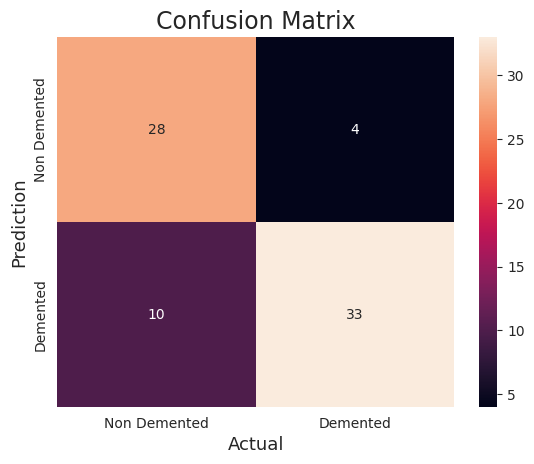

Accuracy   : 0.813
Precision : 0.892
Recall    : 0.767
F1-score  : 0.825


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, y_pred_soft_voting),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, y_pred_soft_voting),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, y_pred_soft_voting),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, y_pred_soft_voting),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(vote_soft,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.75       0.86666667 0.85       0.84745763 0.86440678]
Average Cross Validation score :0.8357062146892655


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred_soft_voting)
auc_roc

0.8212209302325582

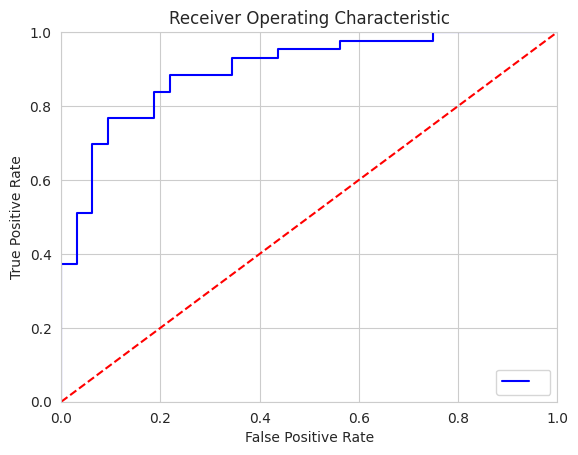

In [ ]:
plot_roc(vote_soft, X_test, y_test)

**8) Ensemble Model:**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
%%time
xt_clf = ExtraTreesClassifier(random_state=42)
xt_clf.fit(X_train, y_train.ravel()) # Fitting the model

CPU times: user 137 ms, sys: 966 µs, total: 138 ms
Wall time: 144 ms


ExtraTreesClassifier(random_state=42)

In [ ]:
# Prediction using test data
y_pred_xt = xt_clf.predict(X_test)

In [ ]:
xt_clf.score(X_test, y_test)

0.8533333333333334

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred_xt)

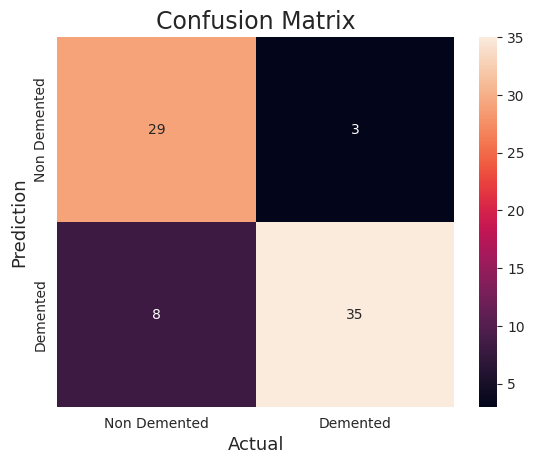

Accuracy   : 0.853
Precision : 0.921
Recall    : 0.814
F1-score  : 0.864


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, y_pred_xt),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, y_pred_xt),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, y_pred_xt),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, y_pred_xt),3)
print("F1-score  :", F1_score)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(xt_clf,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


Cross Validation Scores are [0.83333333 0.85       0.91666667 0.89830508 0.86440678]
Average Cross Validation score :0.8725423728813559


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,y_pred_xt)
auc_roc

0.8601017441860466

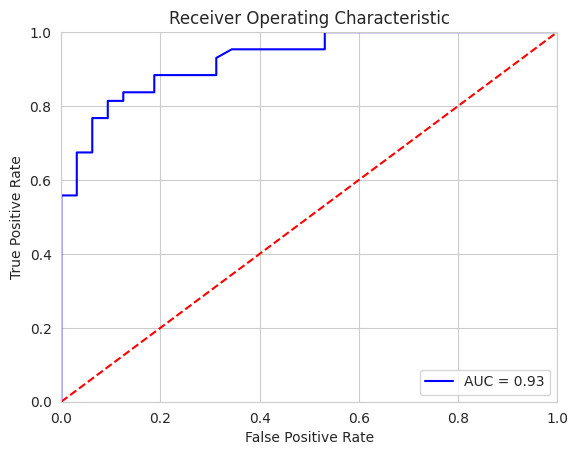

In [ ]:
plot_roc(xt_clf, X_test, y_test)

**9) Naive Bayes Classifier:**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

In [ ]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

**Grid Search CV**

In [ ]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model1,
                     param_grid=params_NB,
                     cv=5,
                     verbose=1,
                     scoring='accuracy')


In [ ]:
gs_NB.fit(X_train, y_train.ravel()) # Fitting the model

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gs_NB.best_estimator_)
print("\n The best score across ALL searched params:\n",gs_NB.best_score_)
print("\n The best parameters across ALL searched params:\n",gs_NB.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GaussianNB(var_smoothing=0.0001519911082952933)

 The best score across ALL searched params:
 0.8020338983050846

 The best parameters across ALL searched params:
 {'var_smoothing': 0.0001519911082952933}


In [ ]:
gs_NB.score(X_test, y_test)

0.72

In [ ]:
# Prediction using test data
gs_NB_y_pred = gs_NB.predict(X_test)

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, gs_NB_y_pred)

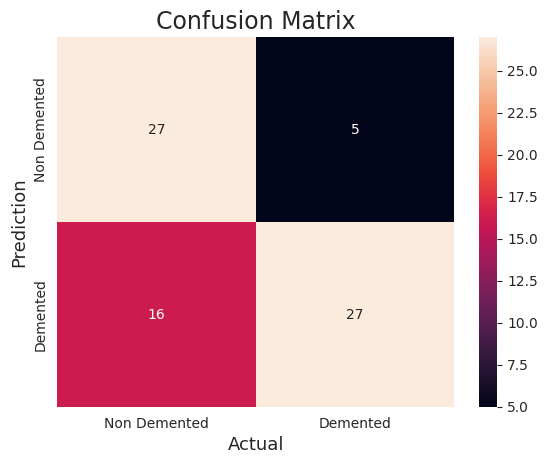

Accuracy   : 0.72
Precision : 0.844
Recall    : 0.628
F1-score  : 0.72


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, gs_NB_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, gs_NB_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, gs_NB_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, gs_NB_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(model1,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.73333333 0.73333333 0.88333333 0.76271186 0.79661017]
Average Cross Validation score :0.781864406779661


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,gs_NB_y_pred)
auc_roc

0.7358284883720931

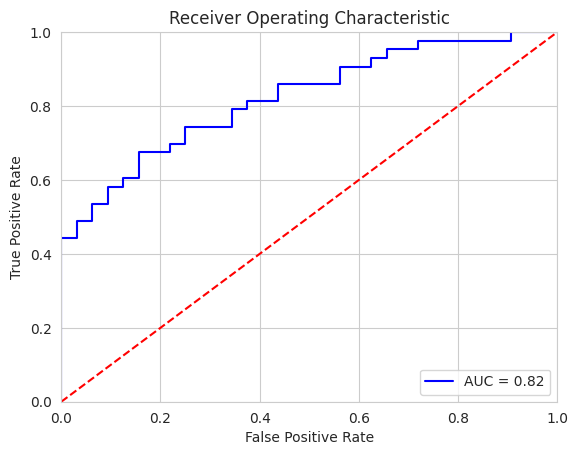

In [ ]:
plot_roc(gs_NB, X_test, y_test)

**10) KNN Classifier:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

**Grid Search CV**

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs1 = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [ ]:
gs1.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gs1.best_estimator_)
print("\n The best score across ALL searched params:\n",gs1.best_score_)
print("\n The best parameters across ALL searched params:\n",gs1.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

 The best score across ALL searched params:
 0.7247457627118644

 The best parameters across ALL searched params:
 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
gs1.score(X_test, y_test)

0.7066666666666667

In [ ]:
# Prediction using test data
gs_KNN_y_pred = gs1.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, gs_KNN_y_pred)

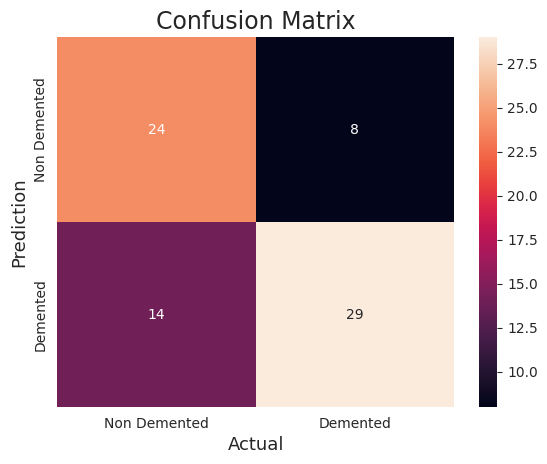

Accuracy   : 0.707
Precision : 0.784
Recall    : 0.674
F1-score  : 0.725


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, gs_KNN_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, gs_KNN_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, gs_KNN_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, gs_KNN_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(knn,X_train,y_train,cv=5)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.61666667 0.63333333 0.66666667 0.66101695 0.62711864]
Average Cross Validation score :0.6409604519774011


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,gs_KNN_y_pred)
auc_roc

0.7122093023255814

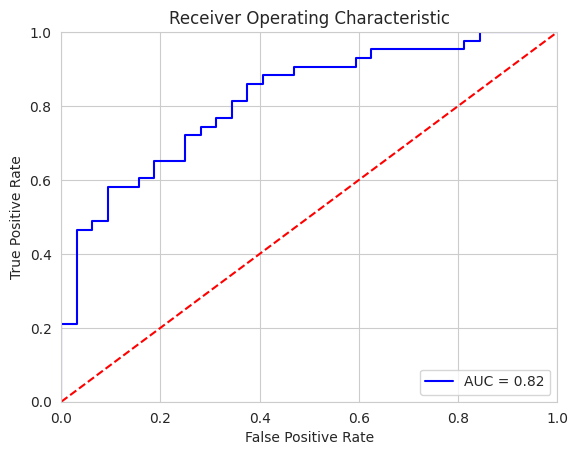

In [ ]:
plot_roc(gs1, X_test, y_test)

**11) Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 147 ms, sys: 3.11 ms, total: 150 ms
Wall time: 927 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

 The best score across ALL searched params:
 0.7987570621468927

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


In [ ]:
grid_search.score(X_test, y_test)

0.7333333333333333

In [ ]:
grid_search_dt_y_pred = grid_search.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, grid_search_dt_y_pred)

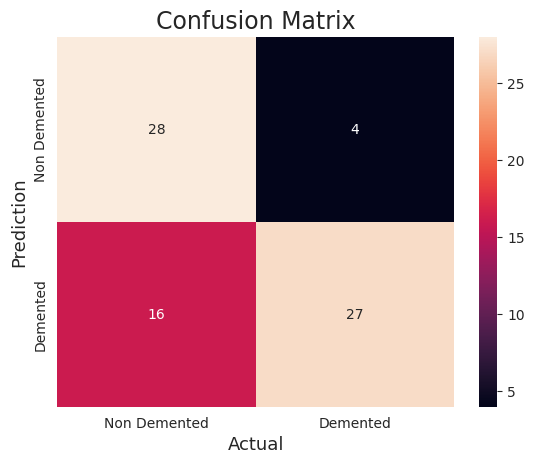

Accuracy   : 0.733
Precision : 0.871
Recall    : 0.628
F1-score  : 0.73


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, grid_search_dt_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, grid_search_dt_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, grid_search_dt_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, grid_search_dt_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics


kf=KFold(n_splits=5)
score=cross_val_score(dt,X_train,y_train,cv=5)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.7        0.75       0.81666667 0.79661017 0.81355932]
Average Cross Validation score :0.7753672316384181


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,grid_search_dt_y_pred)
auc_roc

0.751453488372093

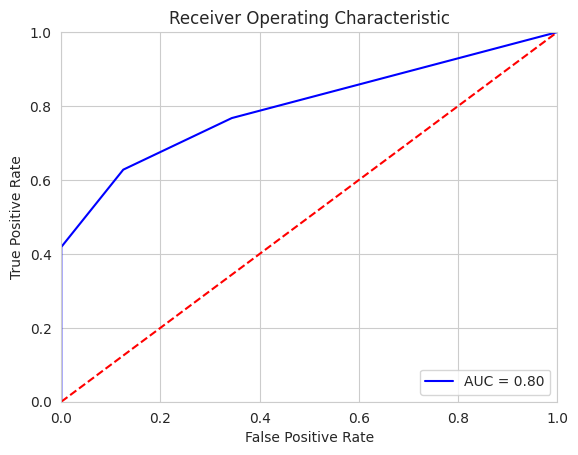

In [ ]:
plot_roc(grid_search, X_test, y_test)

**From the above all the Machine Learning Models, Gradient Boosting is the Best Classification Model with higher Accuracy. So, We are extracting the important features using the Gradient Boosting Model. clf is the Gradient Boosting fit method name.**

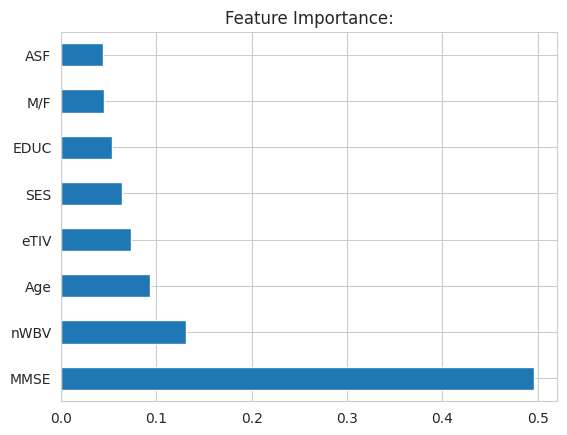

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=feature_col_names)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance:")
plt.show()

**12) Neural Networks - Multi Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train.ravel())

MLPClassifier()

In [ ]:
mlp.score(X_test, y_test)

0.8133333333333334

In [ ]:
mlp_y_pred = mlp.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, mlp_y_pred)

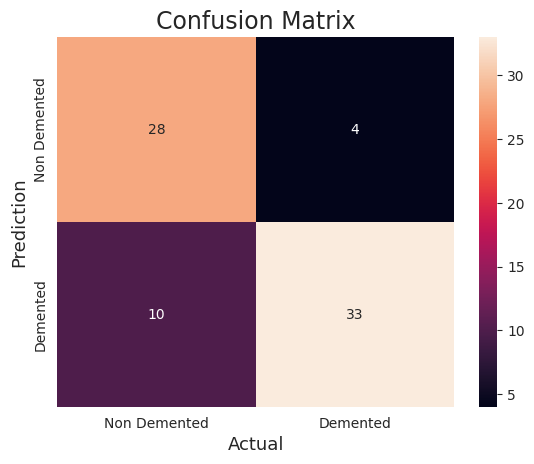

Accuracy   : 0.813
Precision : 0.892
Recall    : 0.767
F1-score  : 0.825


In [ ]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Non Demented', 'Demented'],
            yticklabels=['Non Demented', 'Demented'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = np.round(accuracy_score(y_test, mlp_y_pred),3)
print("Accuracy   :", accuracy)
precision = np.round(precision_score(y_test, mlp_y_pred),3)
print("Precision :", precision)
recall = np.round(recall_score(y_test, mlp_y_pred),3)
print("Recall    :", recall)
F1_score = np.round(f1_score(y_test, mlp_y_pred),3)
print("F1-score  :", F1_score)

**Validation Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

kf=KFold(n_splits=5)
score=cross_val_score(mlp,X_train,y_train,cv=5)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.7        0.73333333 0.83333333 0.88135593 0.81355932]
Average Cross Validation score :0.792316384180791


In [ ]:
auc_roc=metrics.roc_auc_score(y_test,mlp_y_pred)
auc_roc

0.8212209302325582

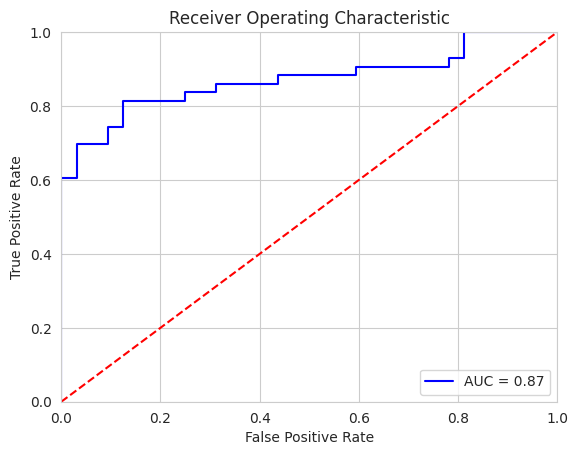

In [ ]:
plot_roc(mlp, X_test, y_test)

In [ ]:
import pandas as pd
data = {'name': ['Alice', 'Bob', 'Charlie'], 'age': [25, 30, 35]}
df = pd.DataFrame(data)
print(df.describe())

        age
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0
